#ASTR 19 Group Project 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [20]:
# Define the oscillatory function
def oscillatory_function(t, A, B, omega, phi):
    return A * np.sin(omega * t + phi) + B


In [21]:
# Define the data
data = """
1 8:07 6.57
1 15:37 -0.39
2 8:55 5.38
2 16:25 -1.74
3 9:45 5.26
3 17:14 -1.36
4 10:35 4.13
4 18:00 -1.15
5 11:28 3.48
5 18:46 -1.61
6 12:22 2.62
6 19:31 0.05
7 13:24 1.83
7 20:16 1.01
8 3:22 3.57
8 21:01 0.73
9 4:07 4.54
9 21:46 2.17
10 4:50 3.76
10 11:58 2.88
11 5:31 3.90
11 12:56 1.92
12 6:08 4.73
12 13:45 1.74
13 6:47 5.66
13 14:25 0.79
14 7:22 5.33
14 15:00 -0.04
15 7:59 5.23
15 15:34 -1.12
16 8:34 6.67
16 16:08 -0.61
17 9:10 4.74
17 16:41 -0.93
18 9:45 4.69
18 17:12 -1.29
19 10:21 4.20
19 17:45 0.22
20 10:57 3.68
20 18:15 0.26
21 11:38 2.47
21 18:48 0.36
22 12:25 2.59
22 19:20 0.99
23 2:22 4.10
23 19:52 1.87
24 2:58 3.17
24 20:30 1.60
25 3:37 3.71
25 10:44 3.10
26 4:23 4.04
26 11:55 2.49
27 5:15 4.07
27 12:57 2.18
28 6:09 5.93
28 13:50 0.70
29 7:05 6.89
29 14:39 0.21
30 7:58 6.72
30 15:27 0.22
31 8:50 6.77
31 16:10 -1.68
32 9:40 5.77
32 16:52 -1.32
33 10:30 4.35
33 17:34 -0.73
34 11:19 4.23
34 18:12 -0.38
35 12:10 2.24
35 18:49 -0.61
36 1:32 3.45
36 19:24 -0.46
37 2:13 4.13
37 20:00 1.21
38 2:54 3.34
38 9:54 2.58
39 3:39 3.32
39 11:15 3.26
40 4:29 5.21
40 12:22 2.39
41 5:21 4.83
41 13:14 2.41
"""


In [22]:
# Parse the data
parsed_data = [line.split() for line in data.strip().split('\n')]

# Extracting relevant columns
day = np.array([float(row[0]) for row in parsed_data])
time_str = [row[1] for row in parsed_data]
tide_height = np.array([float(row[2]) for row in parsed_data])

# Convert time strings to numerical values
time = np.array([int(t.split(':')[0]) + int(t.split(':')[1])/60 for t in time_str])



In [23]:

# Define the error
error = 0.25

# Fit the oscillatory function to the data
popt, pcov = curve_fit(oscillatory_function, time, tide_height, sigma=error*np.ones_like(tide_height), absolute_sigma=True)

# Generate model predictions
model_predictions = oscillatory_function(time, *popt)


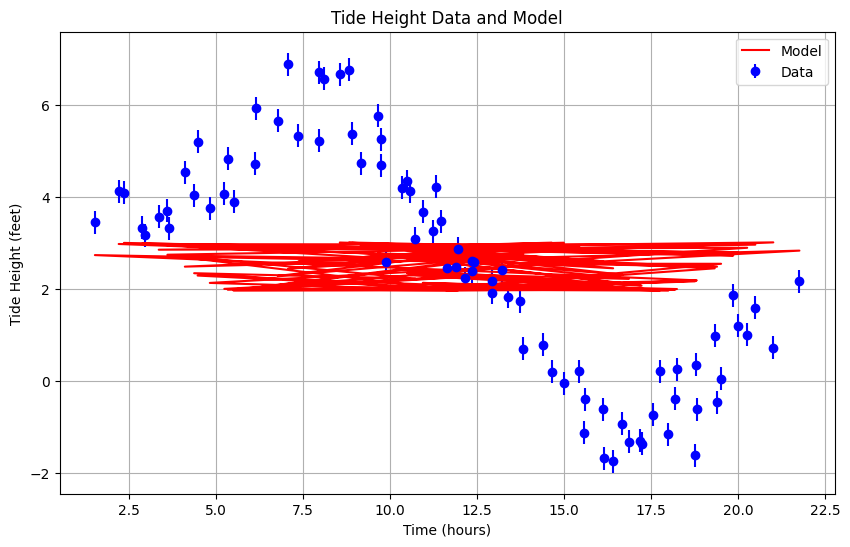

In [24]:
# Plot the data and the model
plt.figure(figsize=(10, 6))
plt.errorbar(time, tide_height, yerr=error, fmt='o', label='Data', color='blue')
plt.plot(time, model_predictions, label='Model', color='red')
plt.xlabel('Time (hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tide Height Data and Model')
plt.legend()
plt.grid(True)

# Save the figure as a PDF
plt.savefig('tide_data_and_model.pdf')

# Subtract the best fit function from the data to obtain residuals
residuals = tide_height - model_predictions

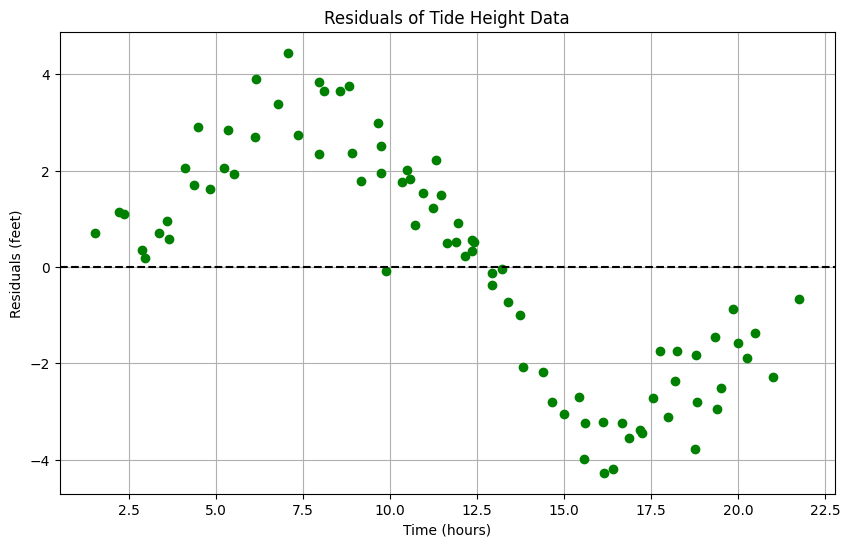

In [25]:

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(time, residuals, 'o', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('Residuals (feet)')
plt.title('Residuals of Tide Height Data')
plt.grid(True)

# Save the figure as a PDF
plt.savefig('tide_residuals.pdf')





Standard deviation of residuals: 2.3512167027622053


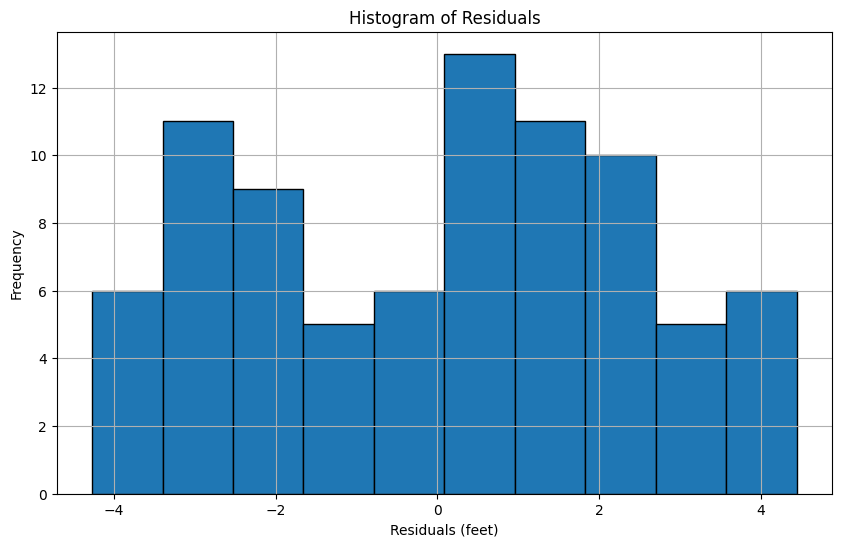

In [26]:
# Plot histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=10, edgecolor='black')
plt.xlabel('Residuals (feet)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)

# Save the histogram as a PDF
plt.savefig('residuals_histogram.pdf')

# Calculate standard deviation of the residuals
std_residuals = np.std(residuals)

# Print standard deviation
print("Standard deviation of residuals:", std_residuals)

Deviation of the tsunami from normal tides model (in terms of standard deviations): 0.8506234230347222


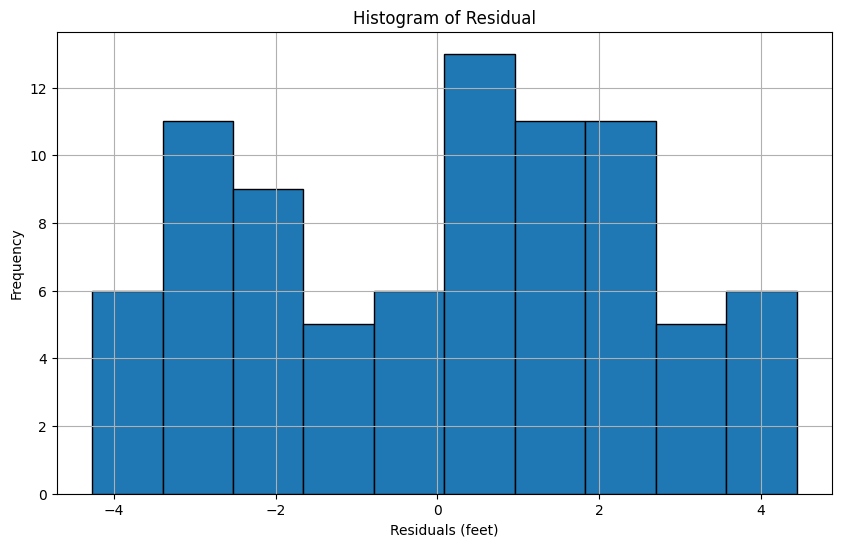

In [27]:
# Calculate the deviation of the tsunami from the normal tides model
tsunami_deviation = 2 / std_residuals
print("Deviation of the tsunami from normal tides model (in terms of standard deviations):", tsunami_deviation)

# Add a 2ft outlier to the residuals and replot the histogram
residuals_with_outlier = np.append(residuals, 2)

plt.figure(figsize=(10, 6))
plt.hist(residuals_with_outlier, bins=10, edgecolor='black')
plt.xlabel('Residuals (feet)')
plt.ylabel('Frequency')
plt.title('Histogram of Residual')

plt.grid(True)
plt.show()